In [1]:
# NO CODE

from prob140 import *
from datascience import *
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')

## The Hypergeometric Distribution ##

When you are sampling at random from a finite population, it is more natural to draw without replacement than with replacement. In this section, we imagine a population of elements each of which is in one of two categories. The goal is to study the number of sampled elements in one category.

We will stick with the probabilists' tradition of calling the two categories "good" and "bad". You could also call them "success" and "failure," in parallel with the previous section.

Consider a population of $N$ elements, $G$ of which are good and the remaining $N-G$ are bad. 

Take a simple random sample of size $n$ from the population. Let $X$ be the number of good elements in the sample. 

Before we find the distribution of $X$, let us list some examples where such situations arise.

- If you are interested in the number of aces in a 5-card poker hand, then the population is the deck consisting of $N = 52$ cards of which $G = 4$ are good (aces) and the remaining $N - G = 48$ are bad. The hand is the simple random sample of size $n = 5$, and $X$ is the number of good elements in the sample.

- If you are interested in the number of Independent voters in a simple random sample of 2000 voters taken from a population of one million voters of whom 1% are Independent, then the population consists of $N = 1,000,000$ voters of whom $G = 10,000$ are good (Independent) and the remaining $N-G = 1,000,000 - 10,000 = 990,000$ are bad. The simple random sample size is $n = 2000$ and $X$ is the number of good elements in the sample.

### Hypergeometric Probabilities ###
A simple random sample is a subset consisting of $n$ elements drawn at random from the population. 

The number of different samples we could draw is therefore $\binom{N}{n}$.

Let us find $P(X = g)$, the chance of getting $g$ good elements in the sample. For this we have to count the number of simple random samples that contain $g$ good elements and $n-g$ bad elements. 

Use the product rule of counting:

- There are $\binom{G}{g}$ choices for the $g$ good elements.
- For each of these, there are $\binom{N-G}{n-g}$ choices for the $n-g$ bad elements.
- Therefore there are $\binom{G}{g}\binom{N-G}{n-g}$ samples that contain $g$ good elements.

Since all of the $\binom{N}{n}$ samples are equally likely, 

$$
P(X = g) ~ = ~ \frac{\binom{G}{g}\binom{N-G}{n-g}}{\binom{N}{n}}
$$

These are rather grandly called *hypergeometric probabilities* because they are related to the [hypergeometric series](https://en.wikipedia.org/wiki/Hypergeometric_function#The_hypergeometric_series) in mathematics.

As an example, the chance of getting two aces in a 5-card poker hand is

$$
P(\text{2 aces in 5-card poker hand}) ~ = ~ \frac{\binom{4}{2}\binom{48}{3}}{\binom{52}{5}}
$$

### Hypergeometric Distribution ###
The distribution of $X$, the number of good elements in the sample, is called the *hypergeometric distribution*. It has three parameters:

- $N$, the population size
- $G$, the number of good elements in the population
- $n$, the simple random sample size

The distribution is given by the formula derived above:

$$
P(X = g) ~ = ~ \frac{\binom{G}{g}\binom{N-G}{n-g}}{\binom{N}{n}}, ~~~ 0 \le g \le n
$$

**Technical Note:** The possible values of $X$ are 0 through $n$ in most applications. But for example if the sample size $n$ is bigger than the total number of good elements $G$, then $X$ can't be equal to $n$. It can be at most $G$. We won't bother with these kinds of situations. In any case, the formula for $P(X = g)$ will work in those cases as well, under the natural definition that quantities like $\binom{10}{15}$ and $\binom{10}{-2}$ are 0. There is no way to choose 15 elements out of 10, and there is no way to choose -2 elements out of 10 either.

If $X$ is the number of aces in a 5-card poker hand then $X$ has the hypergeometric distribution with parameters $N = 52$, $G = 4$, and $n = 5$. Here is the probability histogram of $X$.

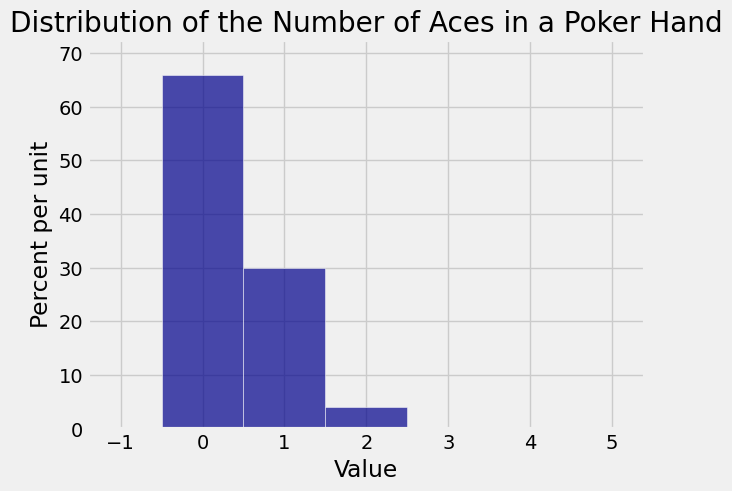

In [2]:
# NO CODE

aces_values = np.arange(5)
aces_probs = stats.hypergeom.pmf(aces_values, 52, 4, 5)
aces_dist = Table().values(aces_values).probabilities(aces_probs)
Plot(aces_dist)
plt.title('Distribution of the Number of Aces in a Poker Hand');

Not surprisingly, 0 is the most likely number of aces in the hand. Though it is possible to get 4 aces, the chance is so small that the bar over the value 4 is not visible.

### Hypergeometric Probabilities in Python ###
You can use the `stats` module of `SciPy` to calculate hypergeometric probabilities, just as you used it to calculate binomial probabilities.

The expression `stats.hypergeom.pmf(g, N, G, n)` evaluates to $P(X = g)$ if $X$ has the hypergeometric $(N, G, n)$ distribution described above.

The numerical value of the chance of 2 aces in a 5-card poker hand is

$$
P(\text{2 aces in 5-card poker hand}) ~ = ~ \frac{\binom{4}{2}\binom{48}{3}}{\binom{52}{5}} ~ \approx ~ 4\%
$$

In [3]:
stats.hypergeom.pmf(2, 52, 4, 5)

0.039929818081078587

You can get several probabilities in the distribution simultaneously by providing the possible values in an array. If `g_array` is an array of possible values whose probabilities you want, then the following expression will evaluate to an array of all their chances:

`stats.hypergeom.pmf(g_array, N, G, n)`

For example, here are all of the chances in the distribution displayed in the histogram above.

In [4]:
# Distribution of the number of aces in a 5-card poker hand

stats.hypergeom.pmf(np.arange(5), 52, 4, 5)

array([  6.58841998e-01,   2.99473636e-01,   3.99298181e-02,
         1.73607905e-03,   1.84689260e-05])

If that is hard to read, you can round the values and then compare them with the bars in the histogram.

In [5]:
np.round(stats.hypergeom.pmf(np.arange(5), 52, 4, 5), 4)

array([ 0.6588,  0.2995,  0.0399,  0.0017,  0.    ])

### Binomial Approximation ###
At the start of this section we considered an example where $X$ is the number of Independent voters in a simple random sample of 2000 voters drawn from a population of one million voters of whom 1% are Independent.

We know that $X$ has the hypergeometric distribution with parameters $N = 1,000,000$, $G = 10,000$, and $n = 2000$.

Suppose instead we had drawn the sample *with* replacement. Then the sample would consist of 2000 independent draws, each of which would be a success with chance 1%. The distribution of $X$ would then be binomial $(2000, 0.01)$.

The figure below overlays the two resulting histograms.

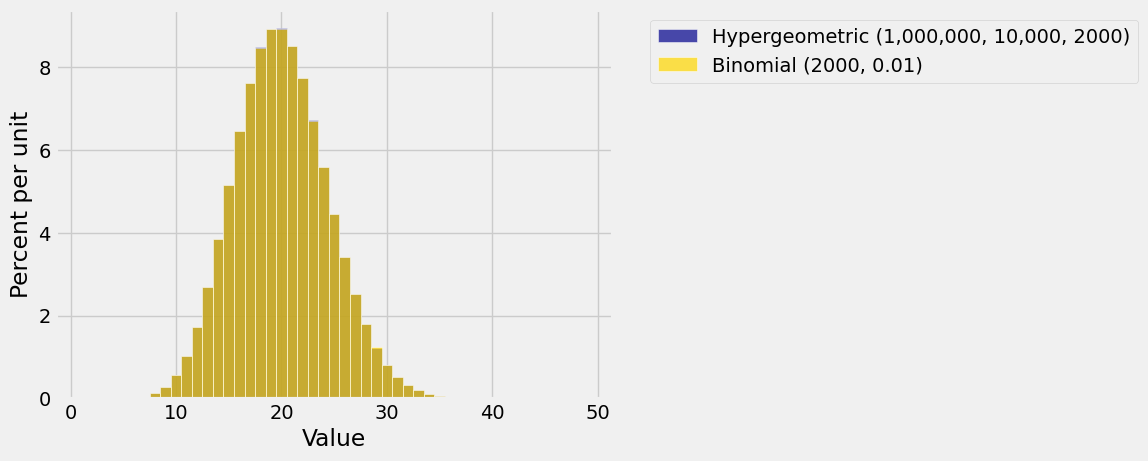

In [6]:
# NO CODE

N = 10**6
G = 10**4
n = 2000
p = 0.01
g = np.arange(51)
hyper_probs = stats.hypergeom.pmf(g, N, G, n)
binom_probs = stats.binom.pmf(g, n, p)
hyper_dist = Table().values(g).probabilities(hyper_probs)
binom_dist = Table().values(g).probabilities(binom_probs)
Plots('Hypergeometric (1,000,000, 10,000, 2000)', hyper_dist, 'Binomial (2000, 0.01)', binom_dist)

Does it look as though only one histogram has been plotted? That's because the two histograms are so similar that the eyes can't tell the difference!

It's important to understand the similarity. The key is that you are sampling only 2000 at random from a population of a million. Because the sample size is so small relative to the population, drawing without replacement is almost like drawing with replacement. Removing a small proportion of a population doesn't change the underlying proportions much.

This is extremely important in data science. Frequently, the populations of interest to data scientists are enormous compared to the samples that researchers can afford to draw. In such cases it is usually fine to pretend that the draws were made with replacement, even if they were made without replacement.